In [ ]:
! pip install pandas numpy scikit-learn xgboost shap flask

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap


In [ ]:
# Load dataset
df = pd.read_csv("data.csv", sep=';') # UCI dataset

# Separate features and target
X = df.drop("Target", axis=1)
y = df["Target"]

# Encode target ONLY
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)
# Dropout=0, Enrolled=1, Graduate=2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale numeric data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Target_numeric                                    1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance\t                      0.075107
Curricular units 2nd sem (credited)               0.054004
Curricular units 1st sem (credited)               0.0481

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


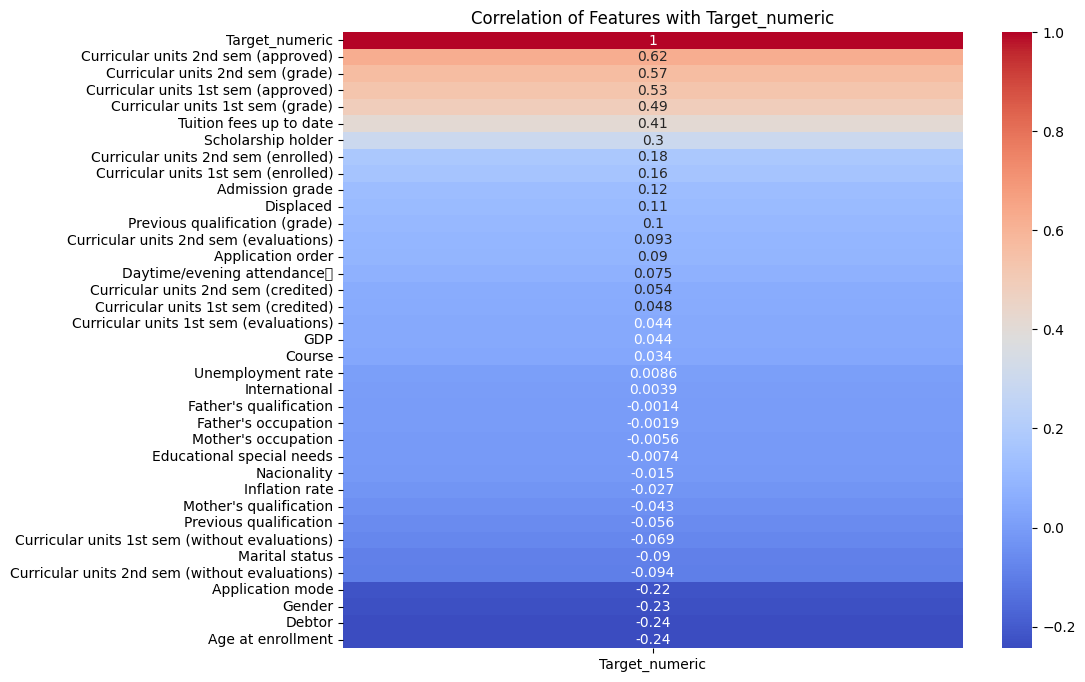

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map the target column to numeric values if it contains strings (e.g., 'Dropout', 'Graduate')
if df['Target'].dtype == 'object':
    df['Target_numeric'] = df['Target'].astype('category').cat.codes
    target_col = 'Target_numeric'
else:
    target_col = 'Target'

# Calculate correlation with the target column using numeric_only=True to avoid errors with other string columns
correlations = df.corr(numeric_only=True)
target_corr = correlations[target_col].sort_values(ascending=False)

# Display numerical correlations
print(target_corr)

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[[target_col]].sort_values(by=target_col, ascending=False), annot=True, cmap='coolwarm')
plt.title(f'Correlation of Features with {target_col}')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


<Figure size 640x480 with 0 Axes>

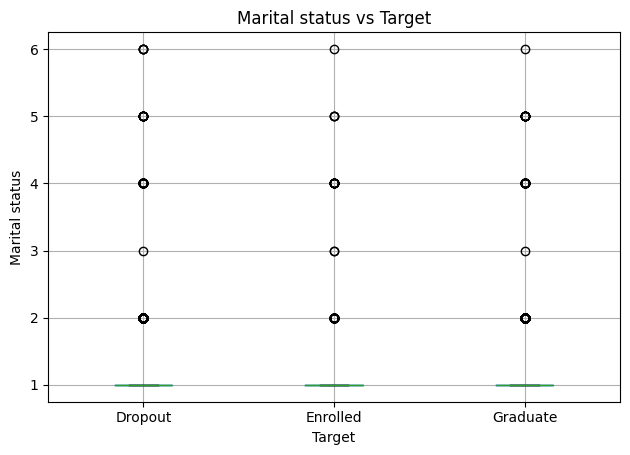

<Figure size 640x480 with 0 Axes>

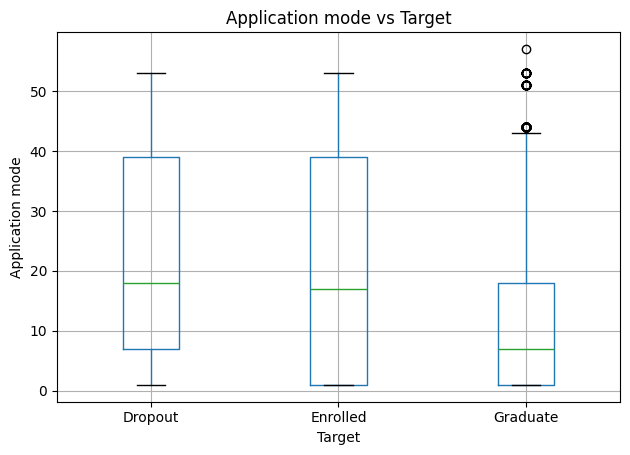

<Figure size 640x480 with 0 Axes>

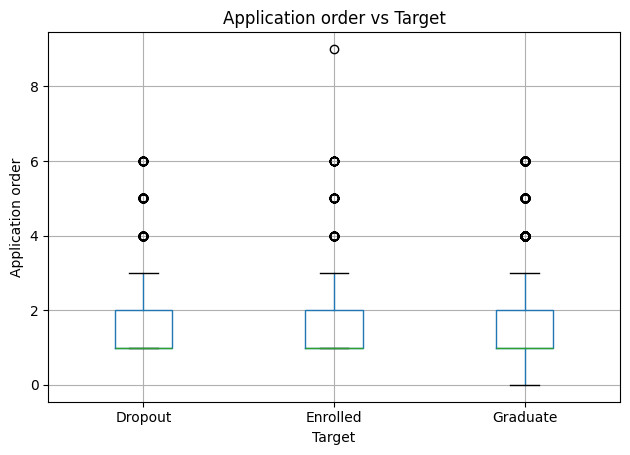

<Figure size 640x480 with 0 Axes>

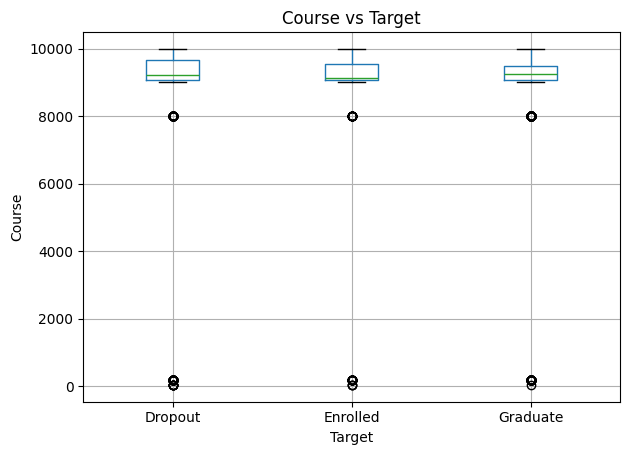

/tmp/ipython-input-1293376053.py:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


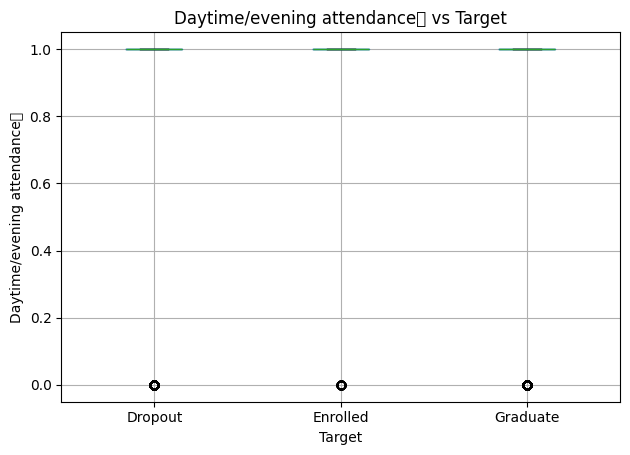

<Figure size 640x480 with 0 Axes>

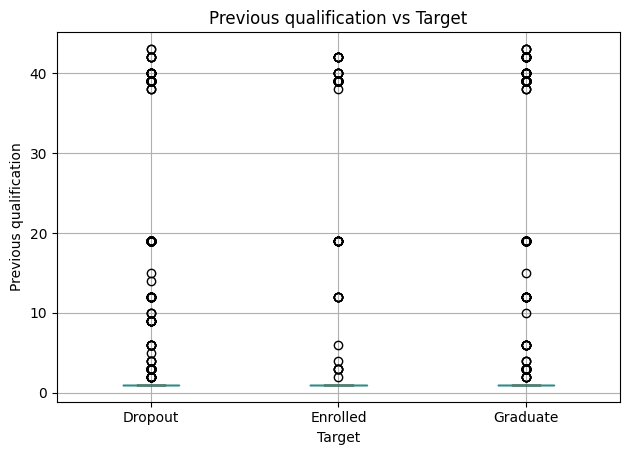

<Figure size 640x480 with 0 Axes>

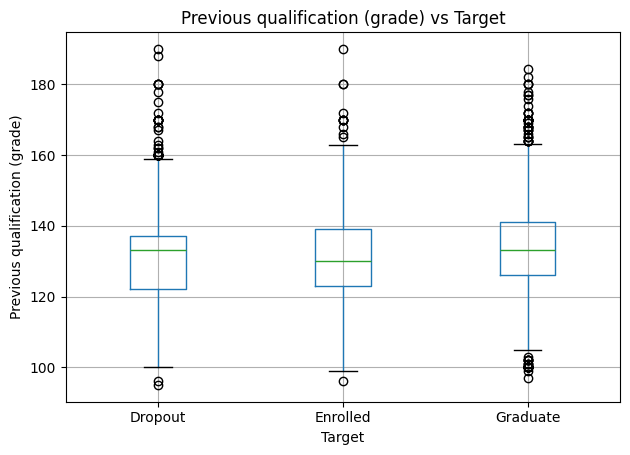

<Figure size 640x480 with 0 Axes>

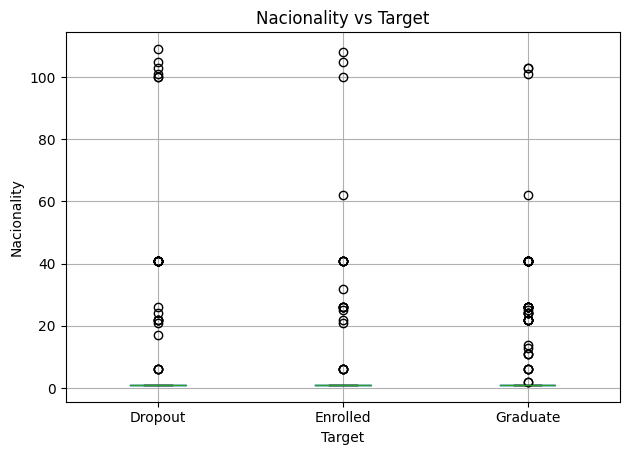

<Figure size 640x480 with 0 Axes>

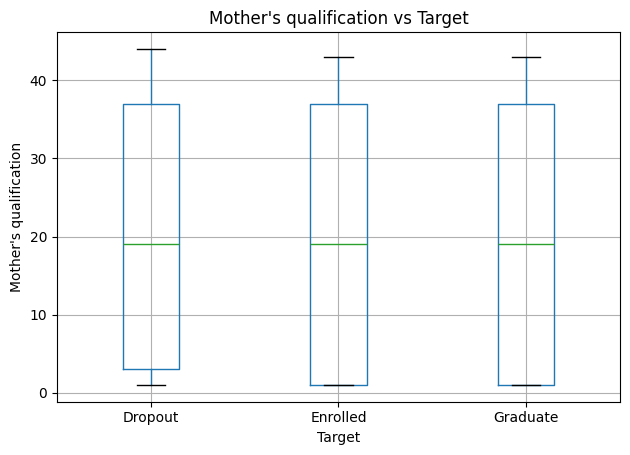

<Figure size 640x480 with 0 Axes>

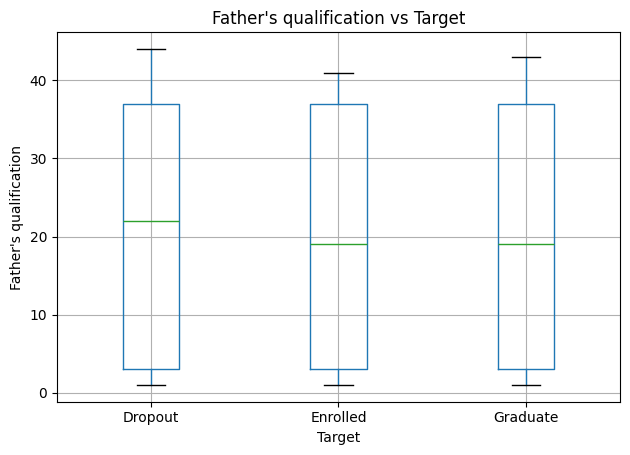

<Figure size 640x480 with 0 Axes>

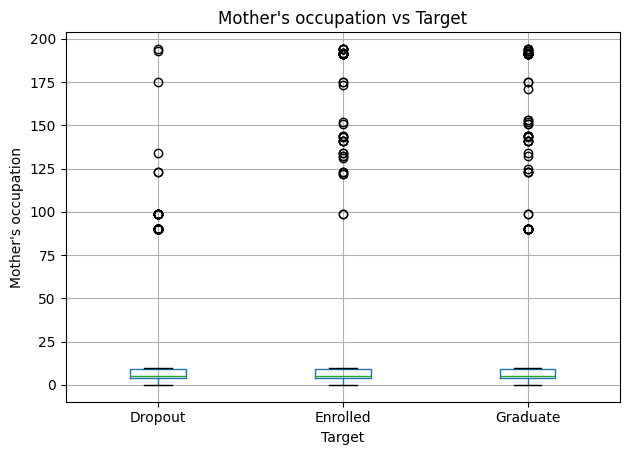

<Figure size 640x480 with 0 Axes>

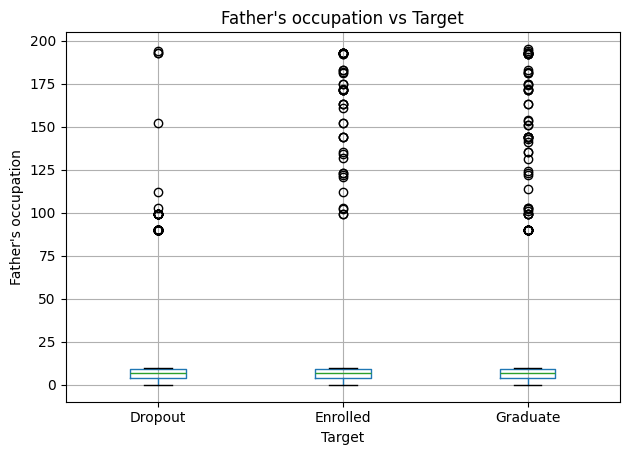

<Figure size 640x480 with 0 Axes>

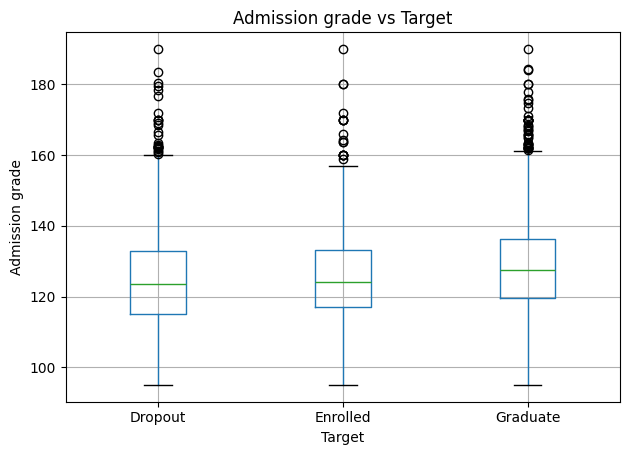

<Figure size 640x480 with 0 Axes>

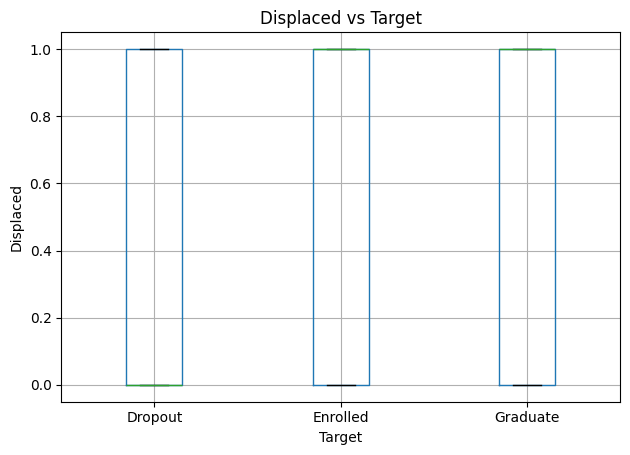

<Figure size 640x480 with 0 Axes>

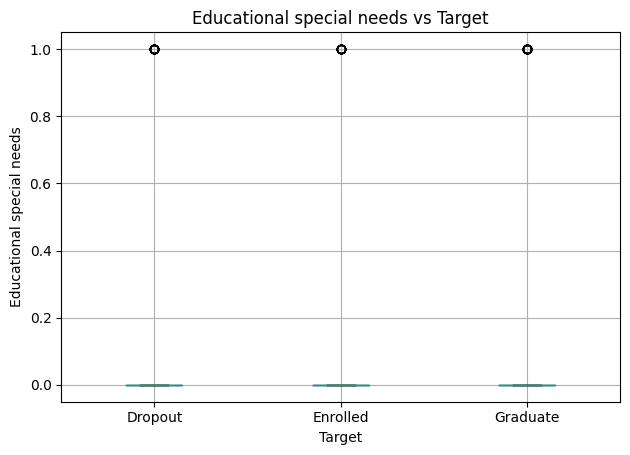

<Figure size 640x480 with 0 Axes>

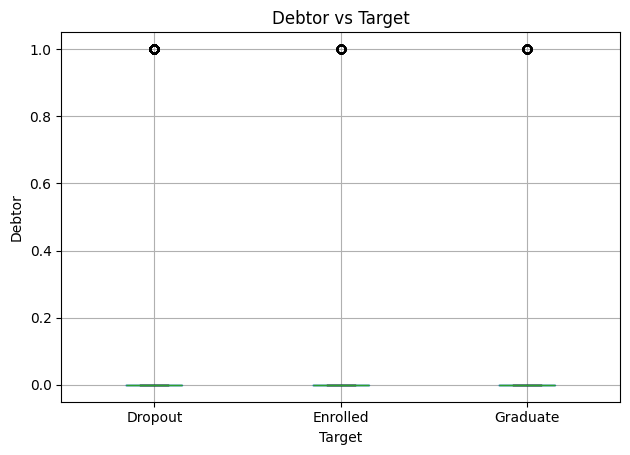

<Figure size 640x480 with 0 Axes>

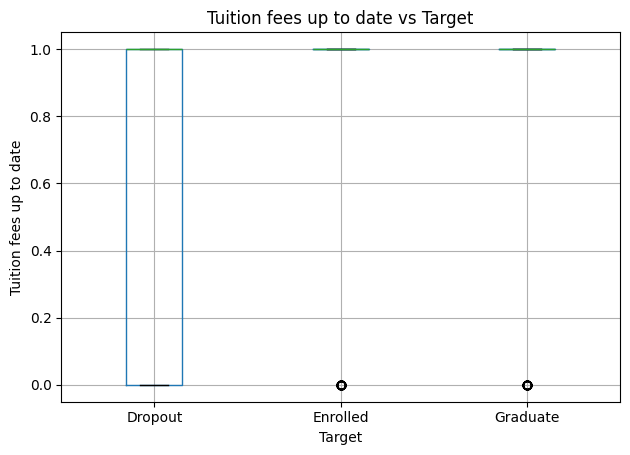

<Figure size 640x480 with 0 Axes>

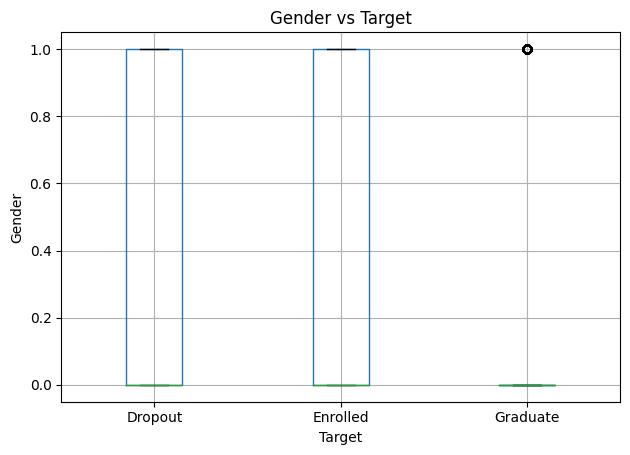

<Figure size 640x480 with 0 Axes>

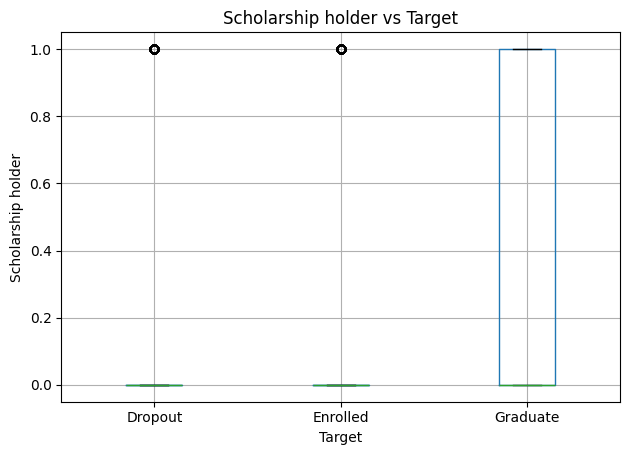

<Figure size 640x480 with 0 Axes>

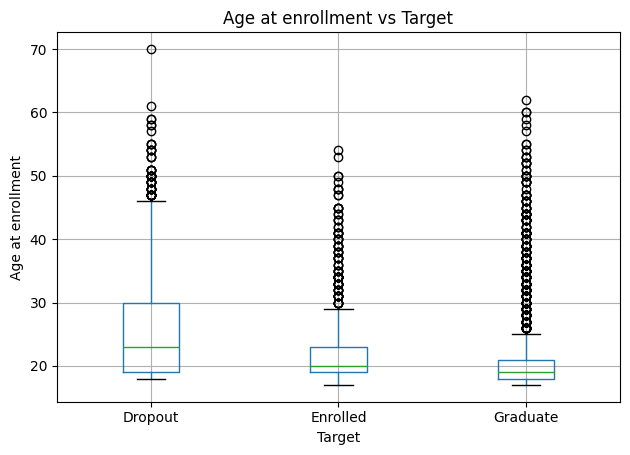

<Figure size 640x480 with 0 Axes>

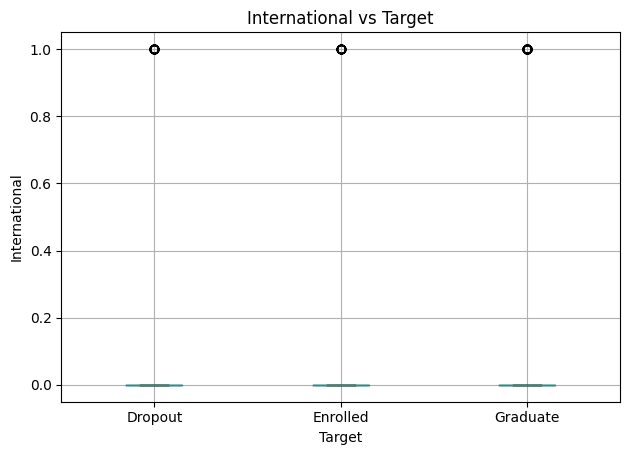

<Figure size 640x480 with 0 Axes>

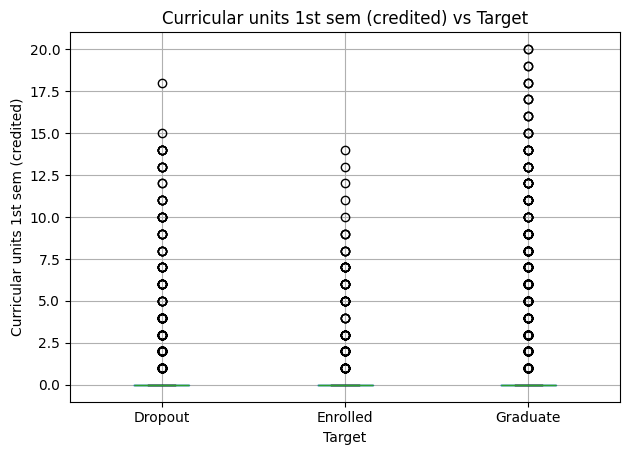

<Figure size 640x480 with 0 Axes>

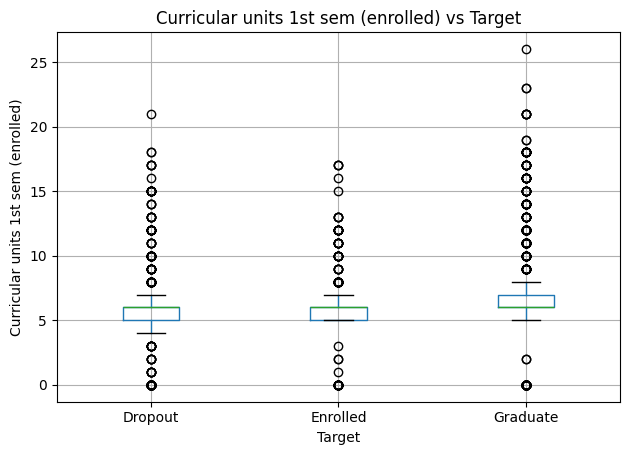

<Figure size 640x480 with 0 Axes>

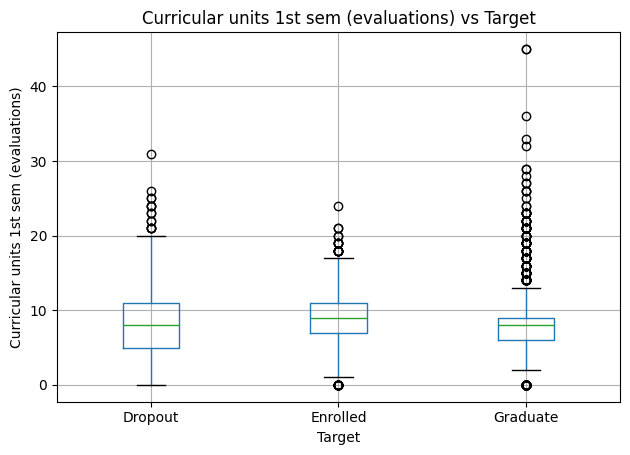

<Figure size 640x480 with 0 Axes>

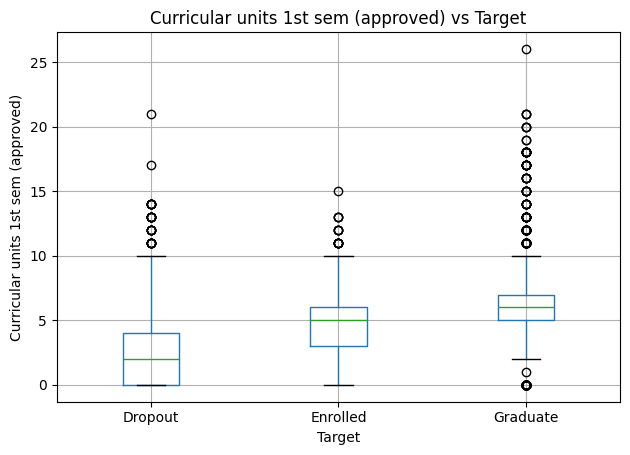

<Figure size 640x480 with 0 Axes>

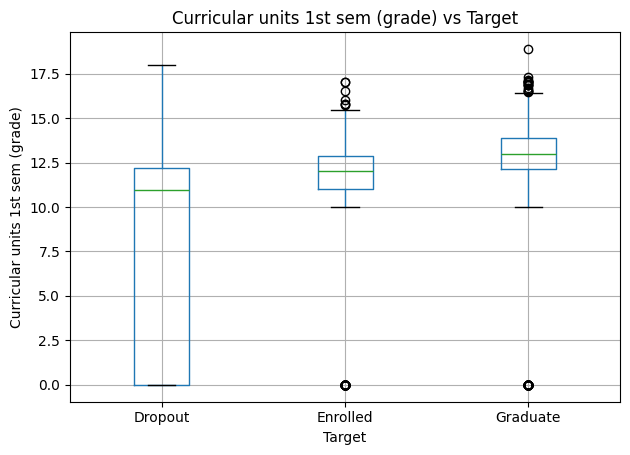

<Figure size 640x480 with 0 Axes>

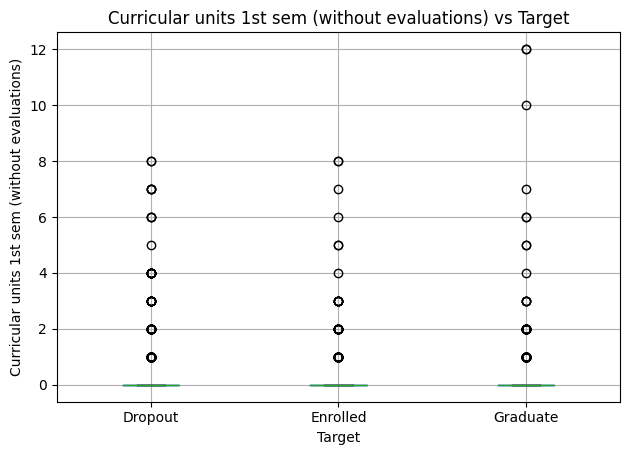

<Figure size 640x480 with 0 Axes>

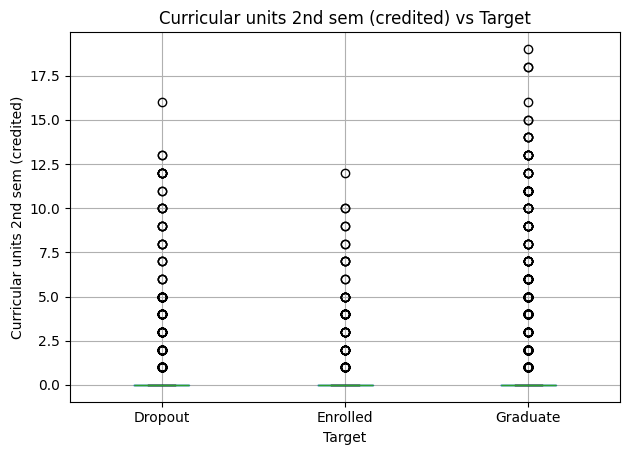

<Figure size 640x480 with 0 Axes>

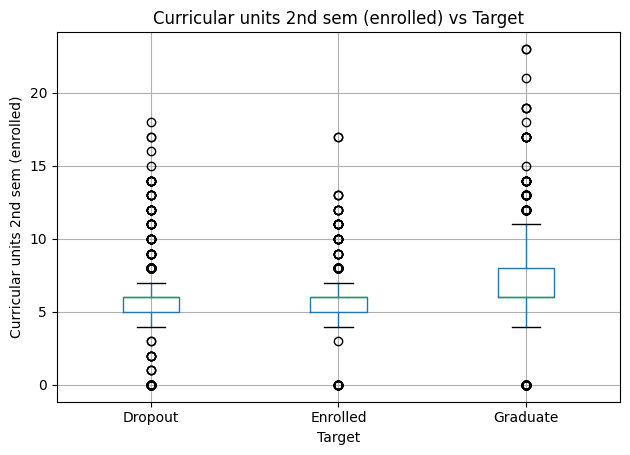

<Figure size 640x480 with 0 Axes>

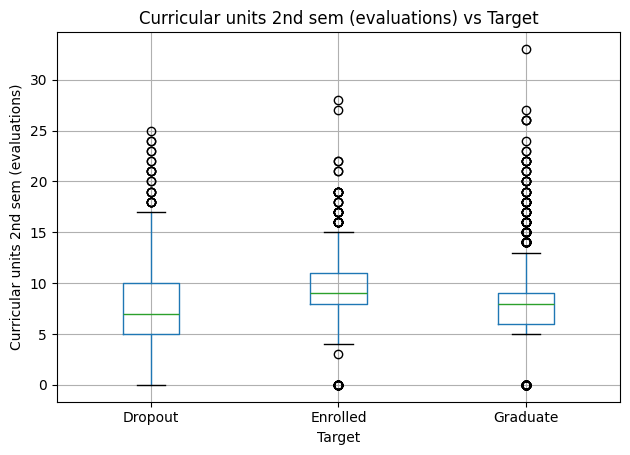

<Figure size 640x480 with 0 Axes>

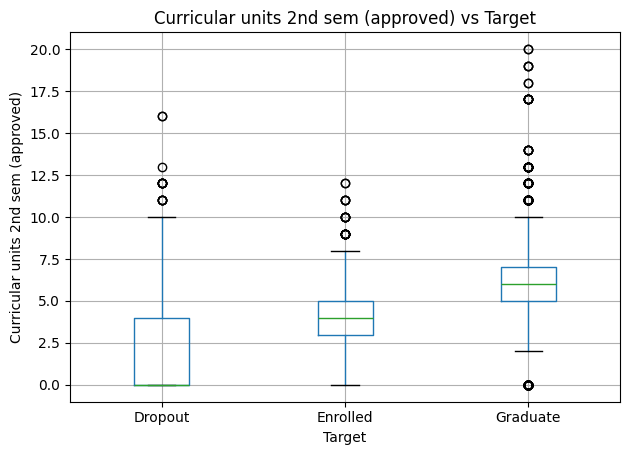

<Figure size 640x480 with 0 Axes>

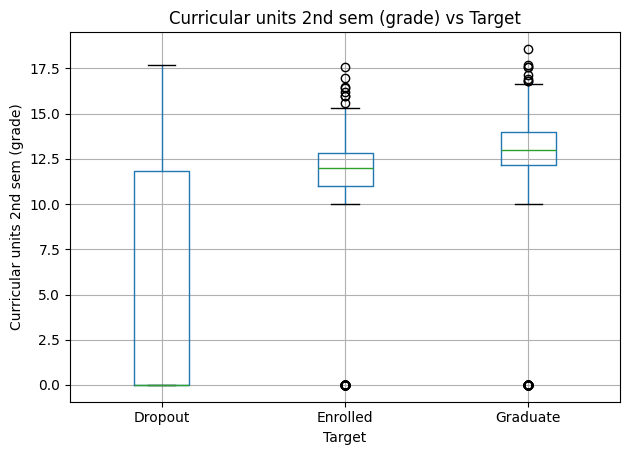

<Figure size 640x480 with 0 Axes>

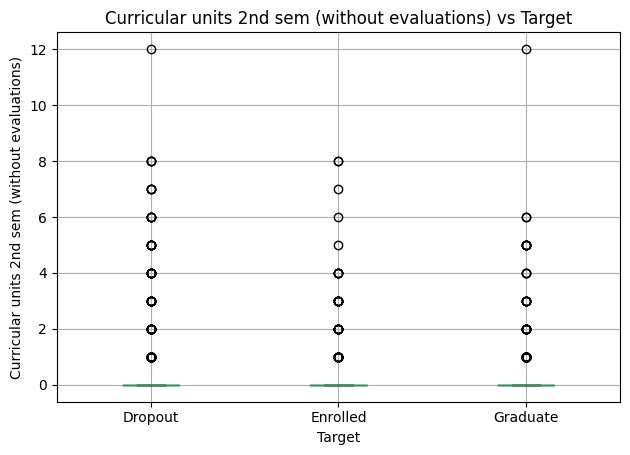

<Figure size 640x480 with 0 Axes>

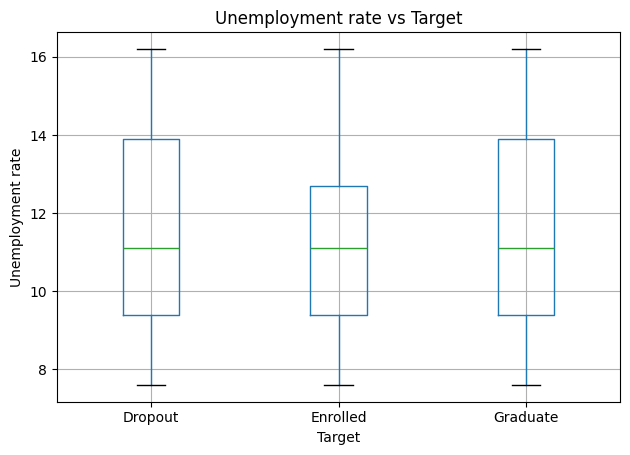

<Figure size 640x480 with 0 Axes>

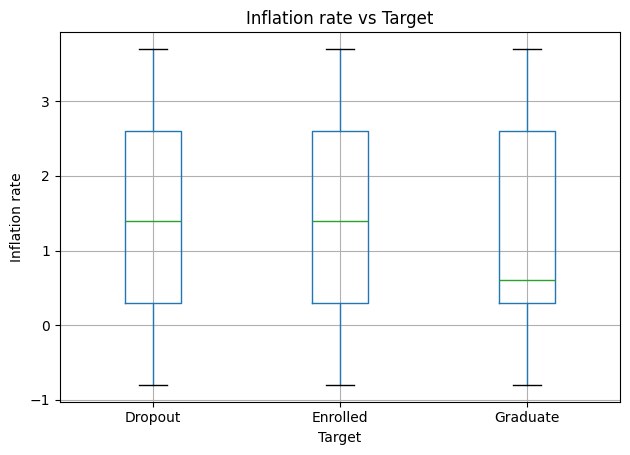

<Figure size 640x480 with 0 Axes>

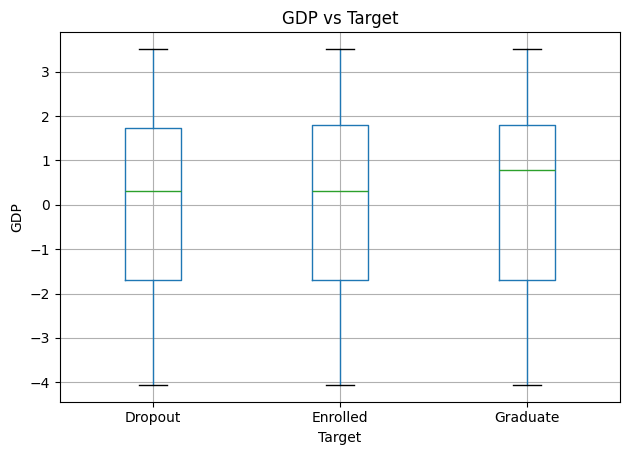

In [ ]:
target_col = 'Target'

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Remove target if present
numeric_cols = [c for c in numeric_cols if c != target_col]
categorical_cols = [c for c in categorical_cols if c != target_col]

# -------------------------------
# NUMERICAL FEATURES → BOXPLOTS
# -------------------------------
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by=target_col)
    plt.title(f"{col} vs {target_col}")
    plt.suptitle("")
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# --------------------------------
# CATEGORICAL FEATURES → STACKED BAR
# --------------------------------
for col in categorical_cols:
    plt.figure()
    pd.crosstab(df[col], df[target_col]).plot(kind='bar', stacked=True)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


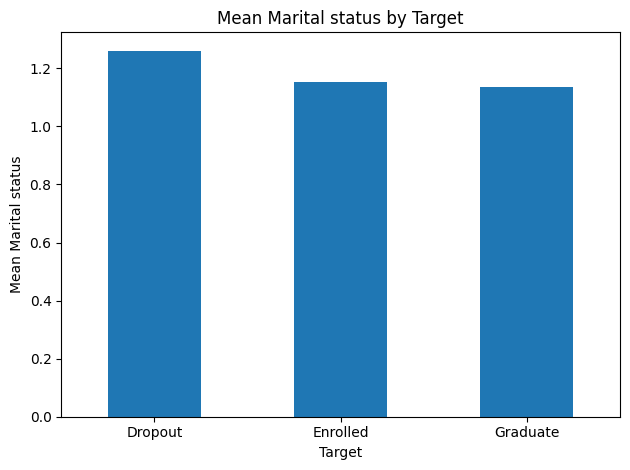

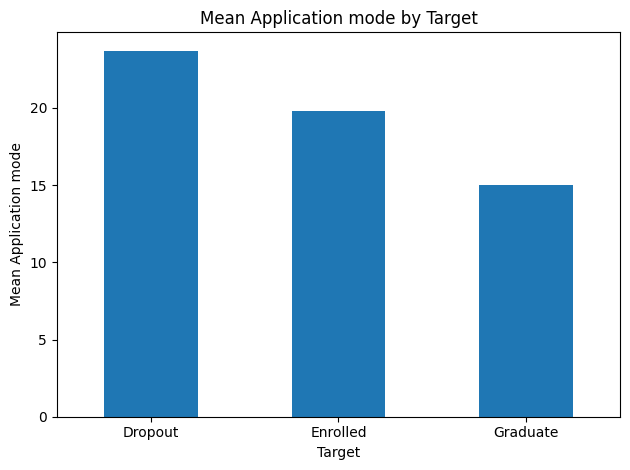

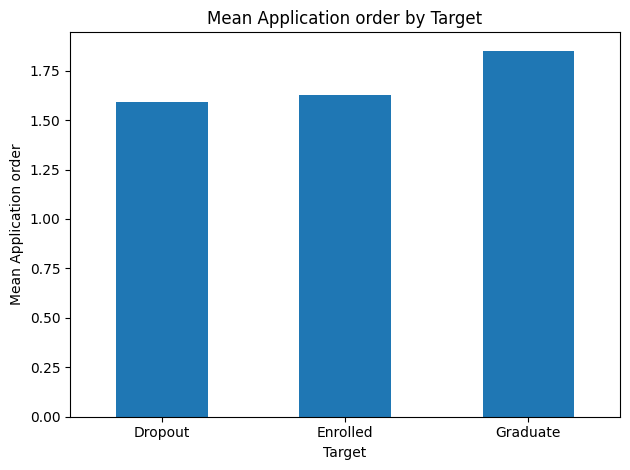

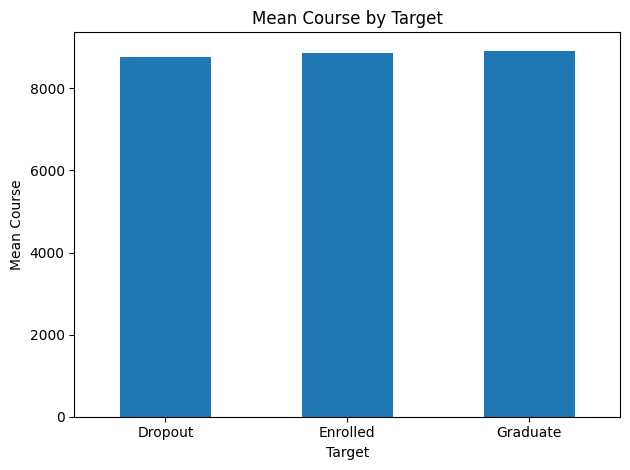

/tmp/ipython-input-1322866702.py:8: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


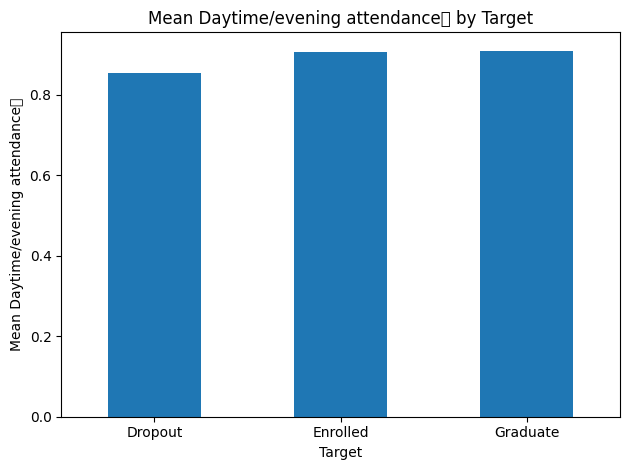

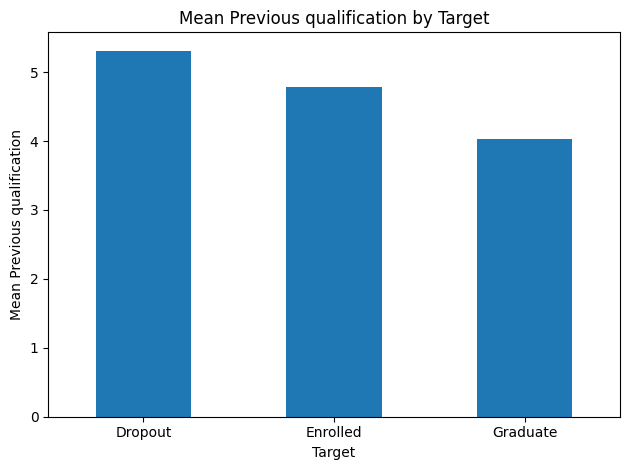

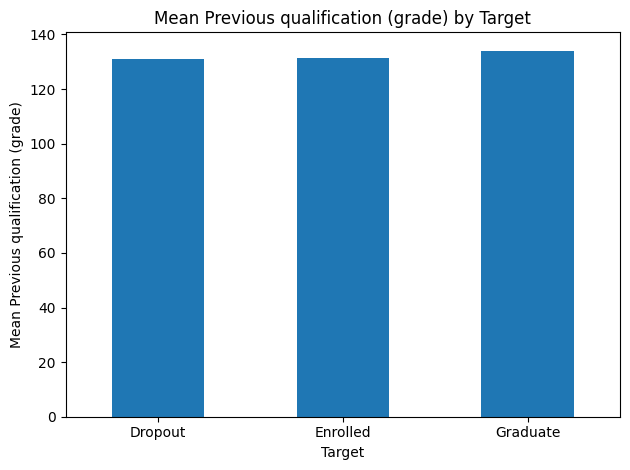

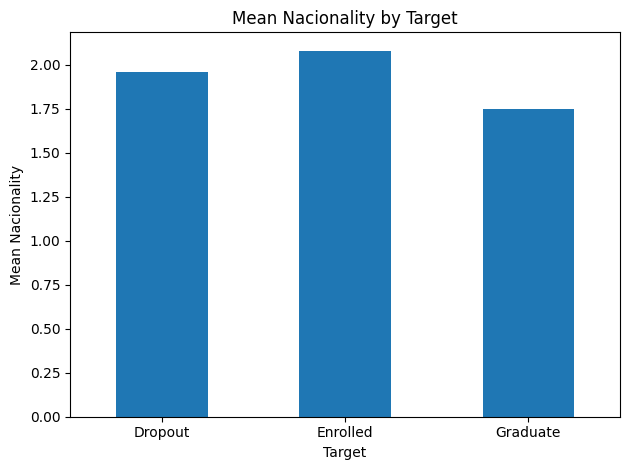

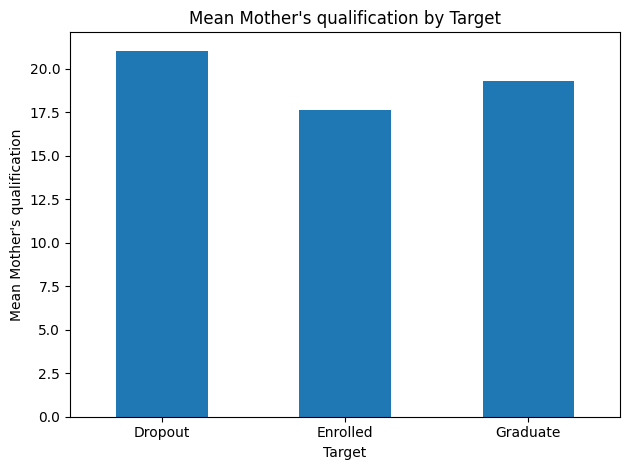

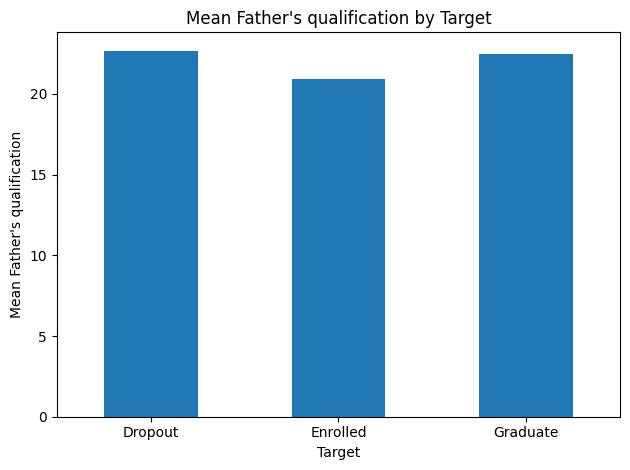

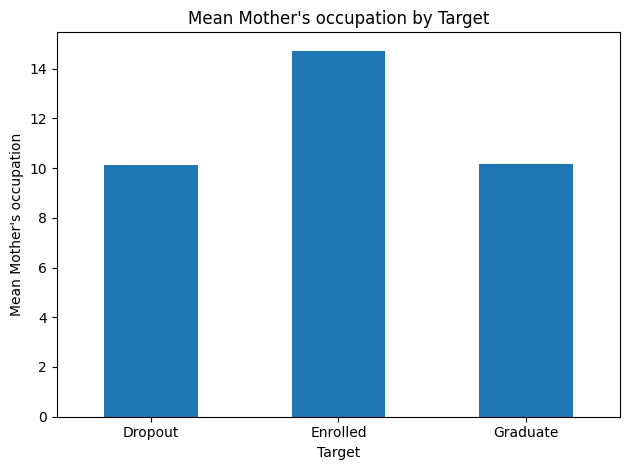

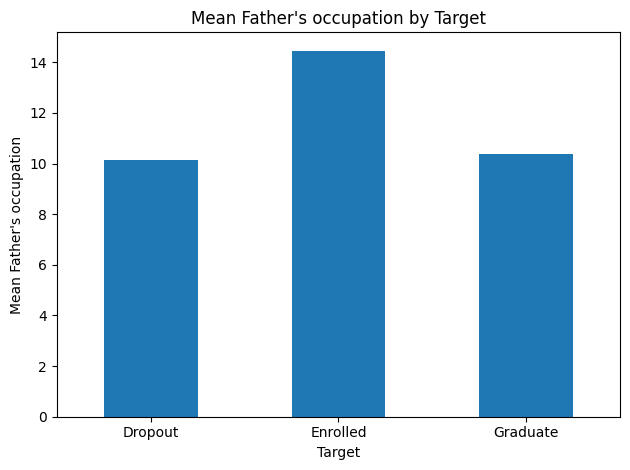

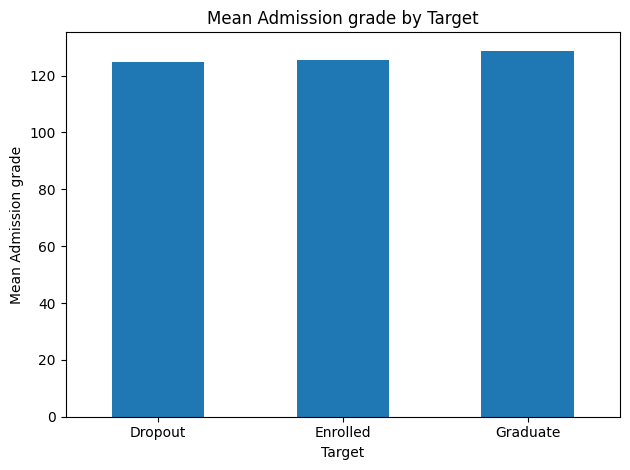

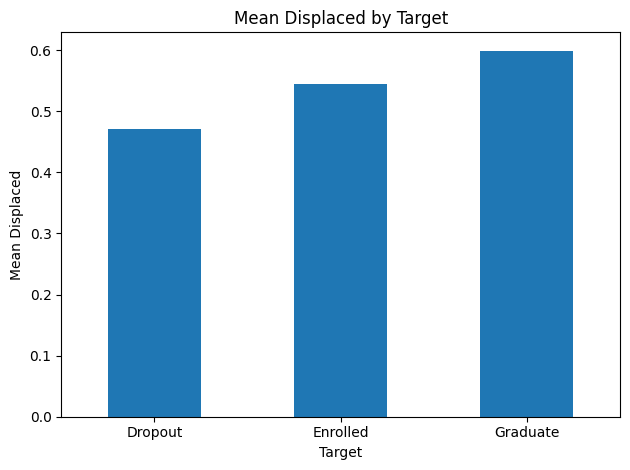

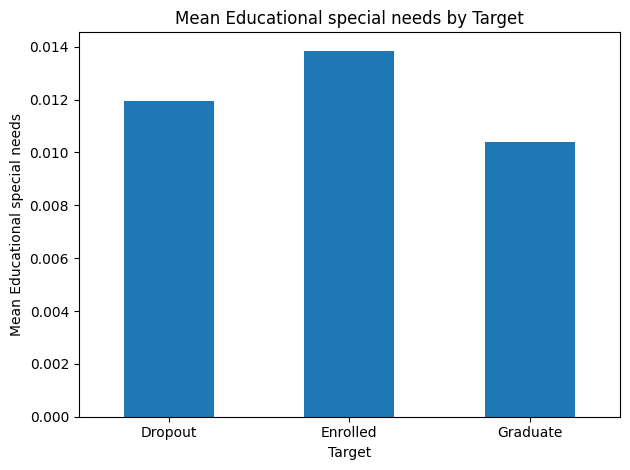

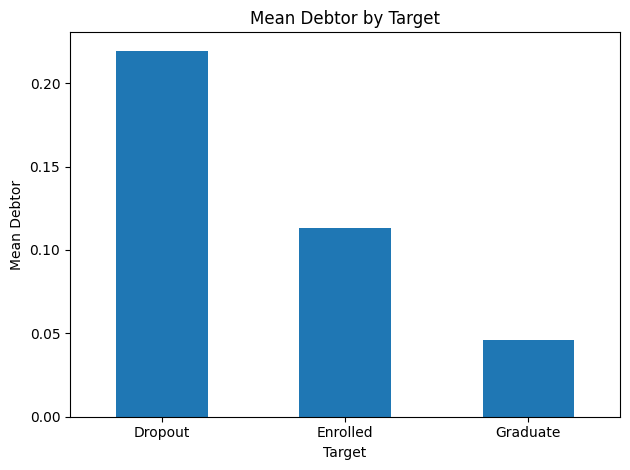

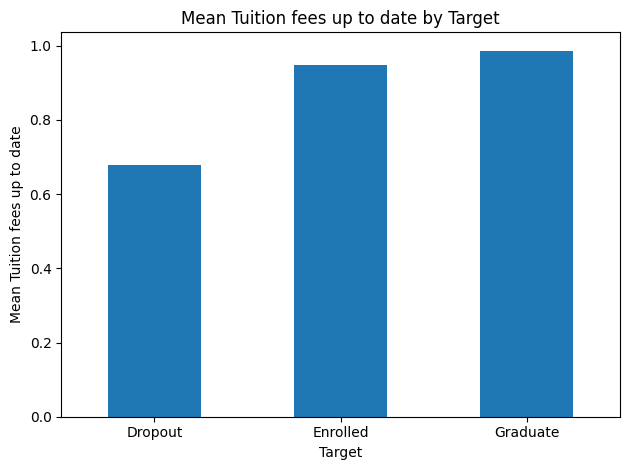

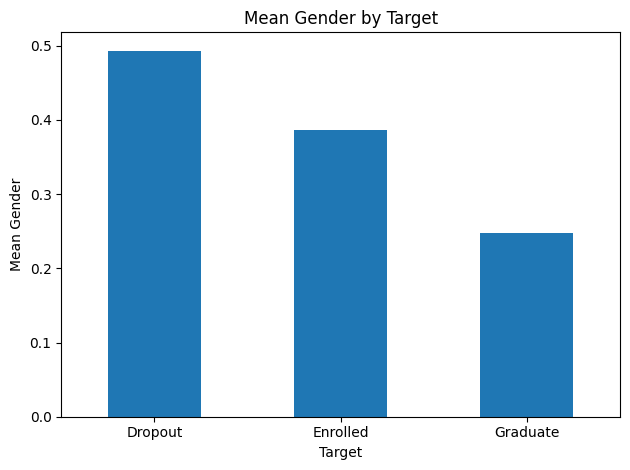

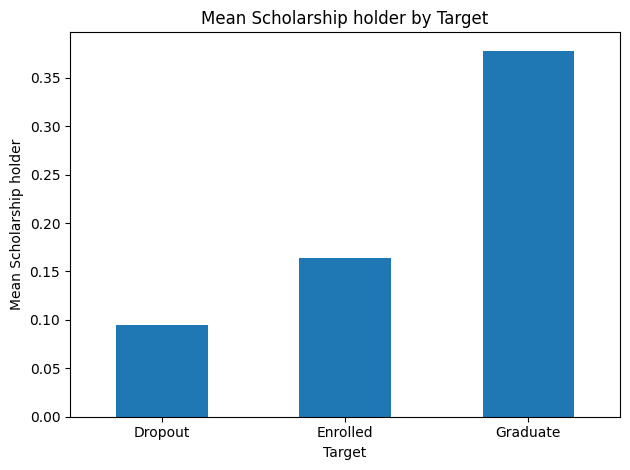

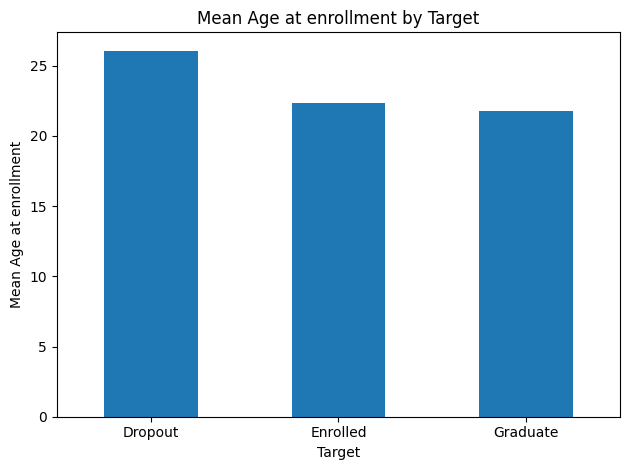

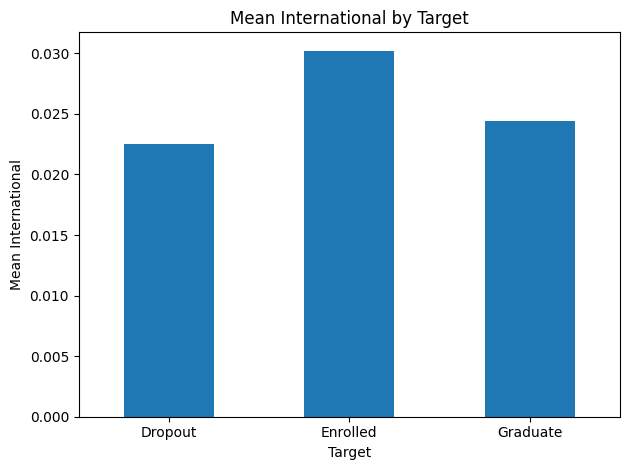

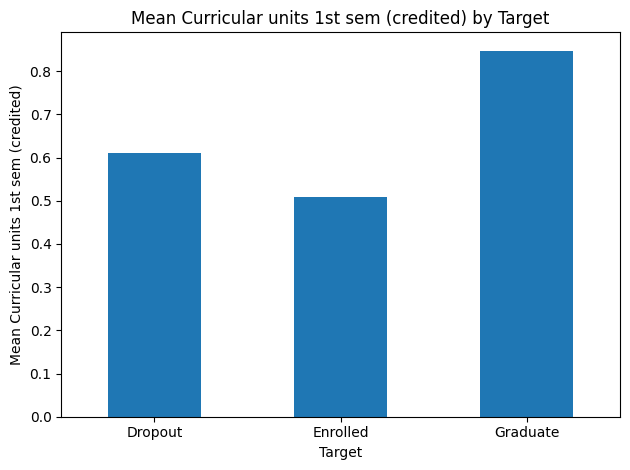

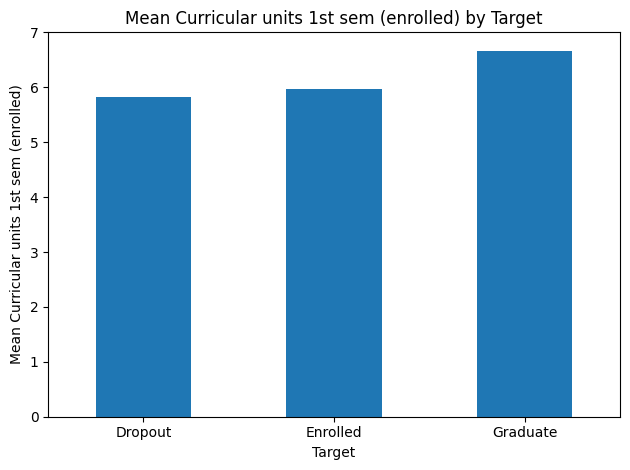

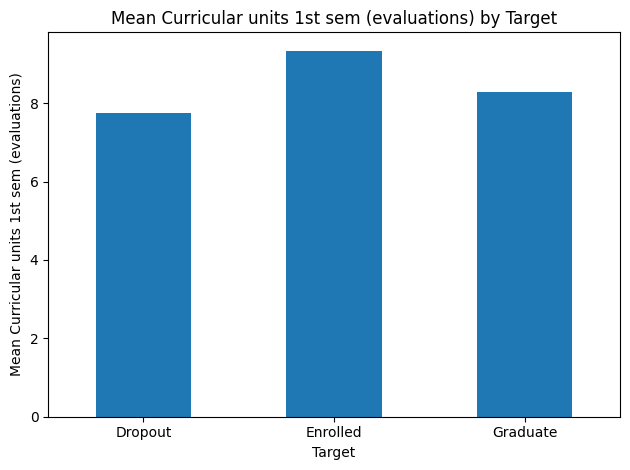

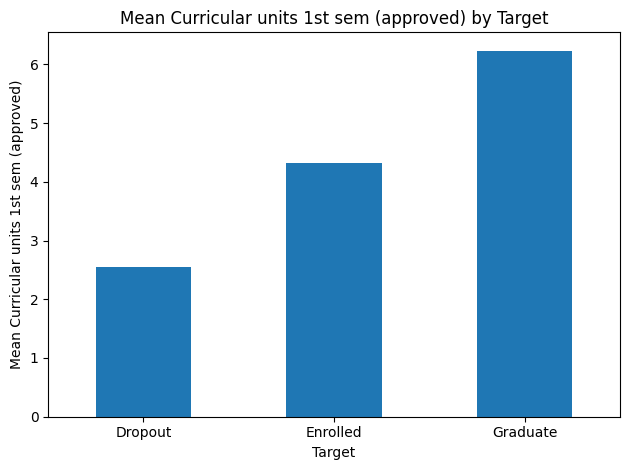

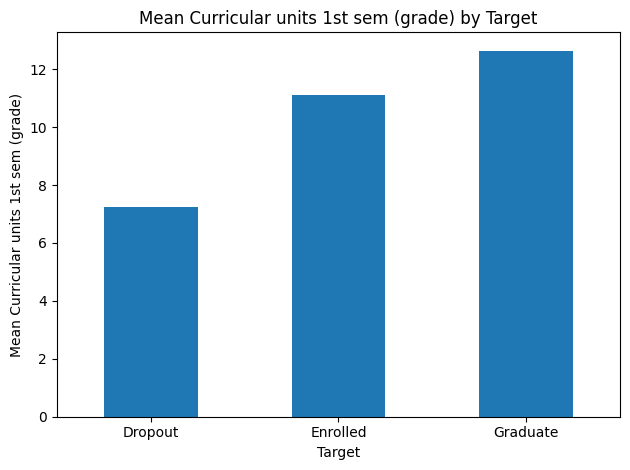

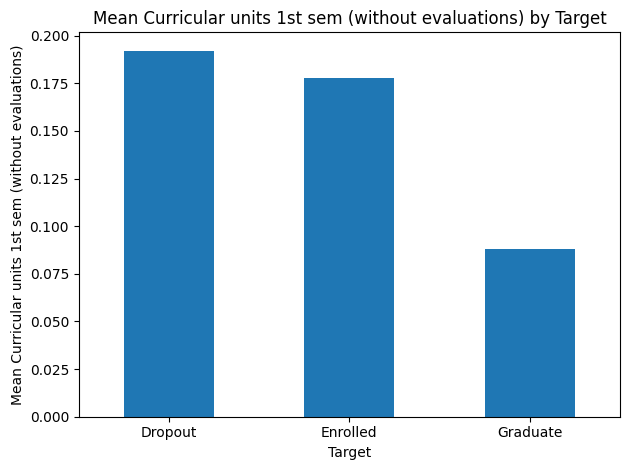

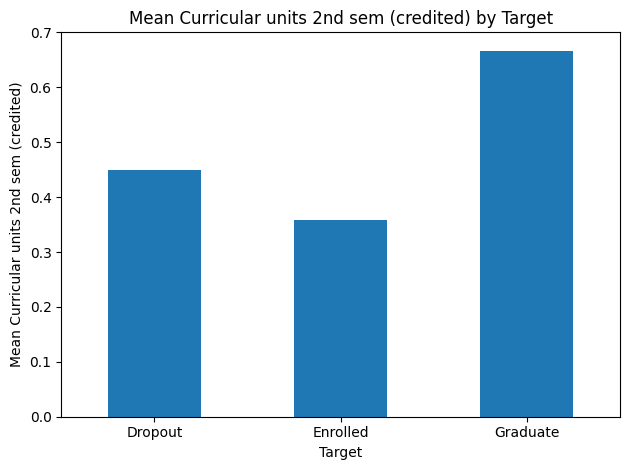

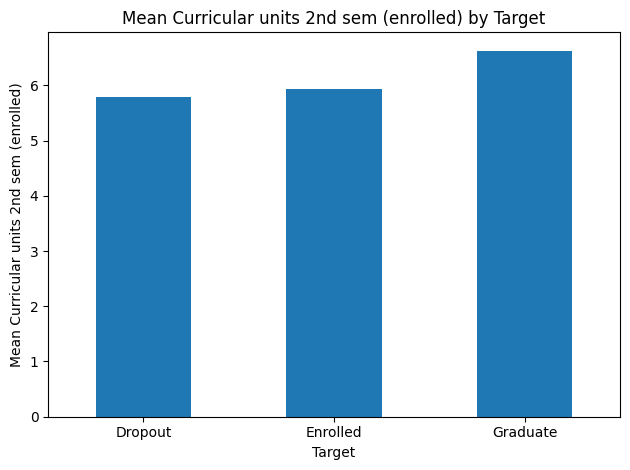

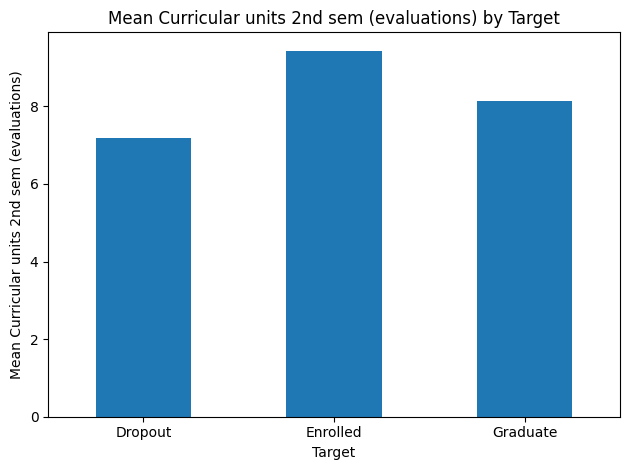

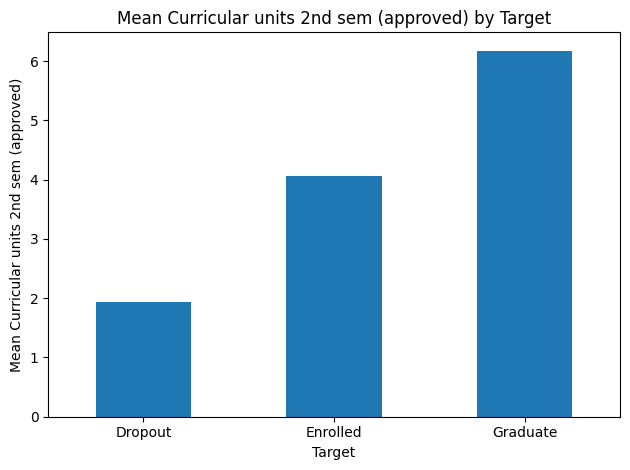

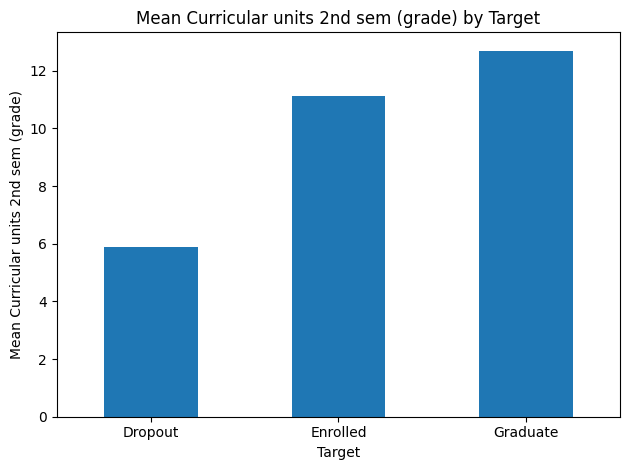

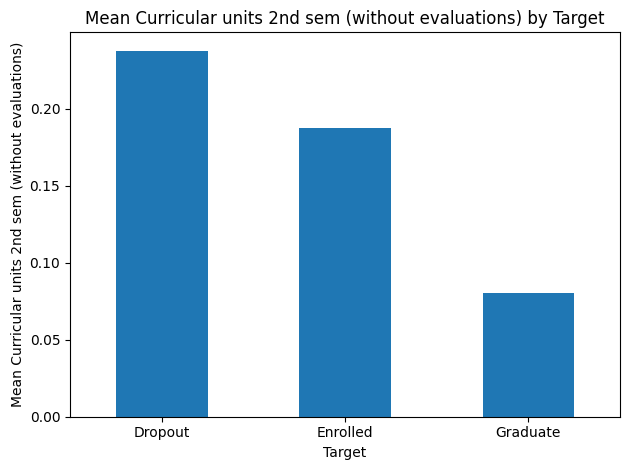

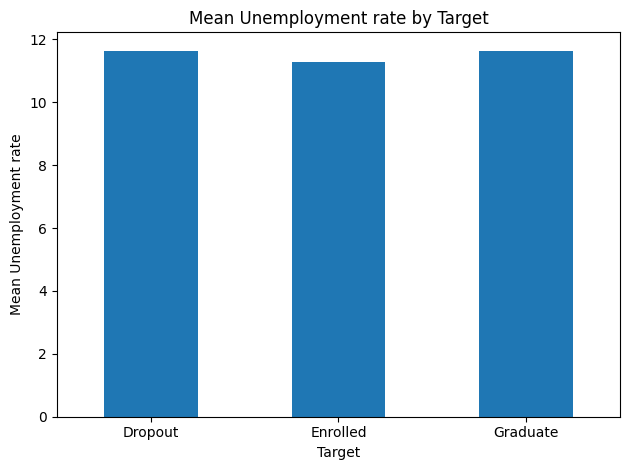

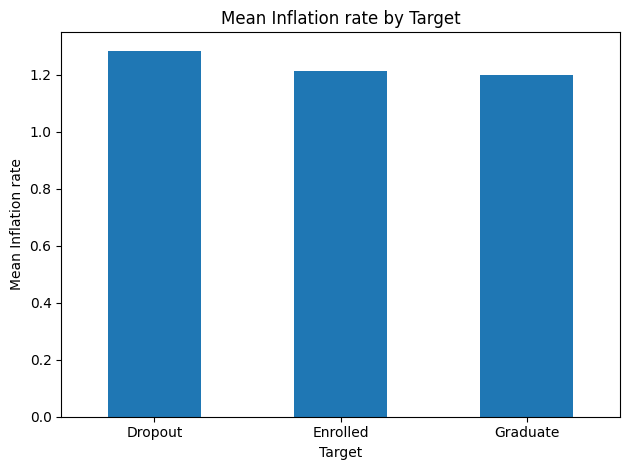

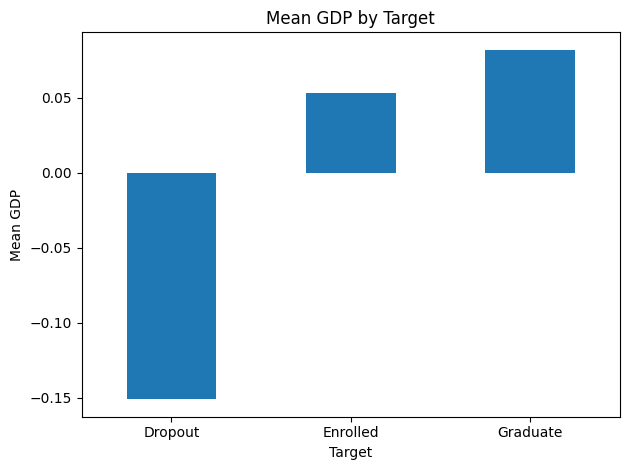

In [ ]:
for col in numeric_cols:
    plt.figure()
    df.groupby(target_col)[col].mean().plot(kind='bar')
    plt.title(f"Mean {col} by {target_col}")
    plt.xlabel(target_col)
    plt.ylabel(f"Mean {col}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is the feature DataFrame and y is the target variable
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")


Selected Features: ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred,
    target_names=target_encoder.classes_
))

Accuracy: 0.768361581920904
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885



In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred,
    target_names=target_encoder.classes_
))

Accuracy: 0.7706214689265537
              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.79       284
    Enrolled       0.57      0.35      0.43       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.77      0.75       885



In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    objective='multi:softprob',
    eval_metric='mlogloss'
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred,
    target_names=target_encoder.classes_
))


Accuracy: 0.7717514124293785
              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       284
    Enrolled       0.55      0.46      0.50       159
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.77      0.77       885



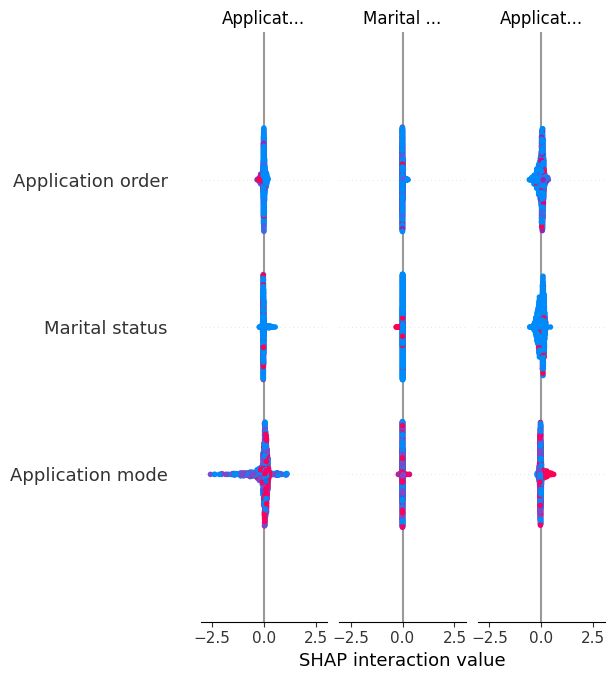

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Global explanation
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


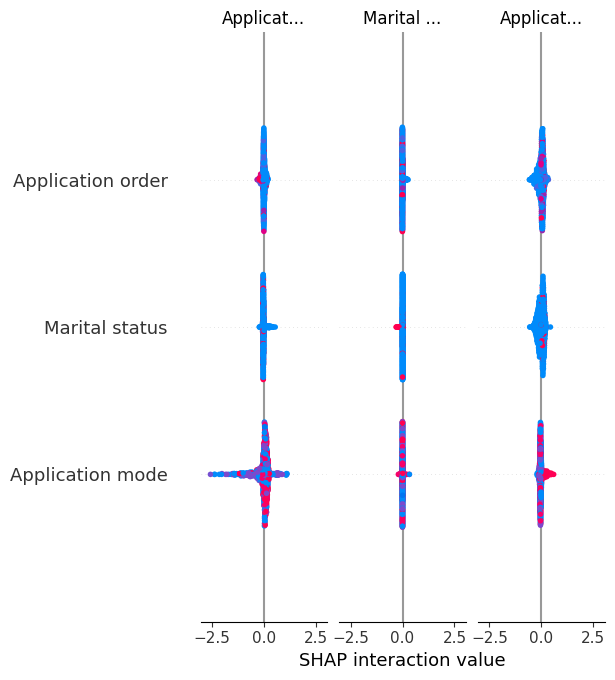

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Global explanation
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=X.columns
)


In [ ]:
sample = X.iloc[[0]]
sample_scaled = scaler.transform(sample)

pred = xgb.predict(sample_scaled)
proba = xgb.predict_proba(sample_scaled)

print("Prediction:", target_encoder.inverse_transform(pred)[0])
print("Confidence:", np.max(proba))


Prediction: Dropout
Confidence: 0.74987334
